In [1]:
import librosa
import librosa.display
from scipy.signal import butter, lfilter
import pywt
import numpy as np
import matplotlib.pyplot as plt

## Load the Audio File

In [2]:
# Load audio file
audio_file = 'Levitating.mp3'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file)

# Display basic info about the audio
print(f"Sample Rate: {sr}")
print(f"Audio Length: {librosa.get_duration(y=y, sr=sr)} seconds")


Sample Rate: 22050
Audio Length: 230.1561904761905 seconds


## Visualizing the Waveform

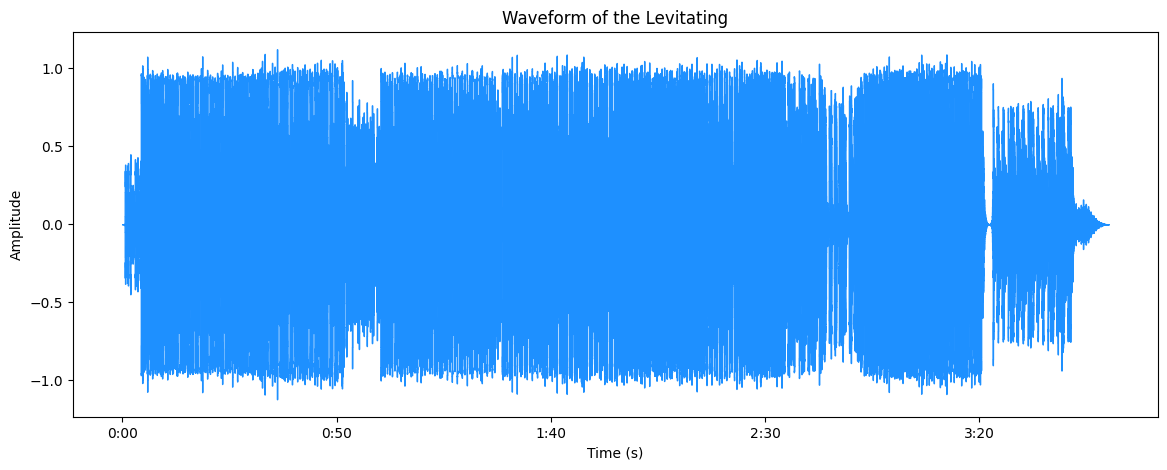

In [3]:
# Plot the waveform of the audio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='dodgerblue')
plt.title('Waveform of the Levitating')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


## Visualizing the Spectrogram

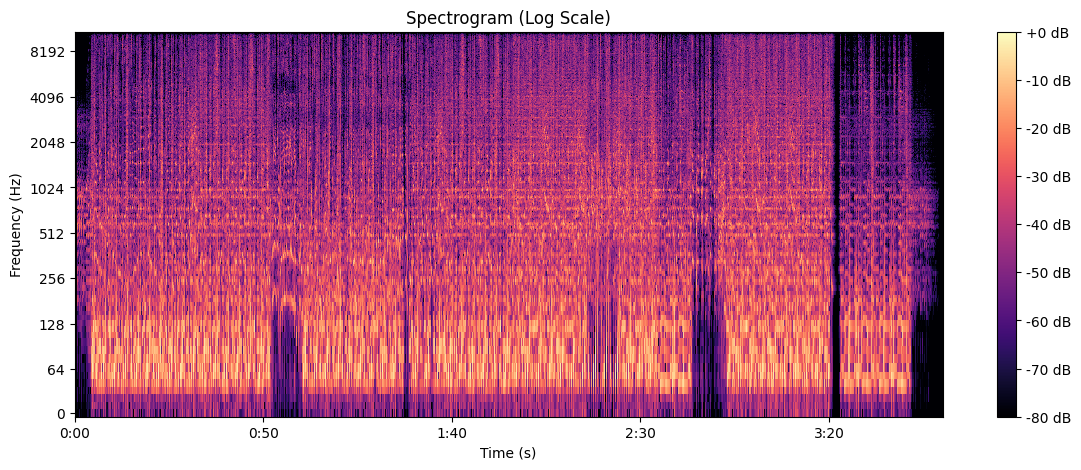

In [4]:
# Compute the spectrogram
D = librosa.stft(y)
D_db = librosa.amplitude_to_db(abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.title('Spectrogram (Log Scale)')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()


## Visualizing the Mel-frequency Cepstral Coefficients (MFCCs)

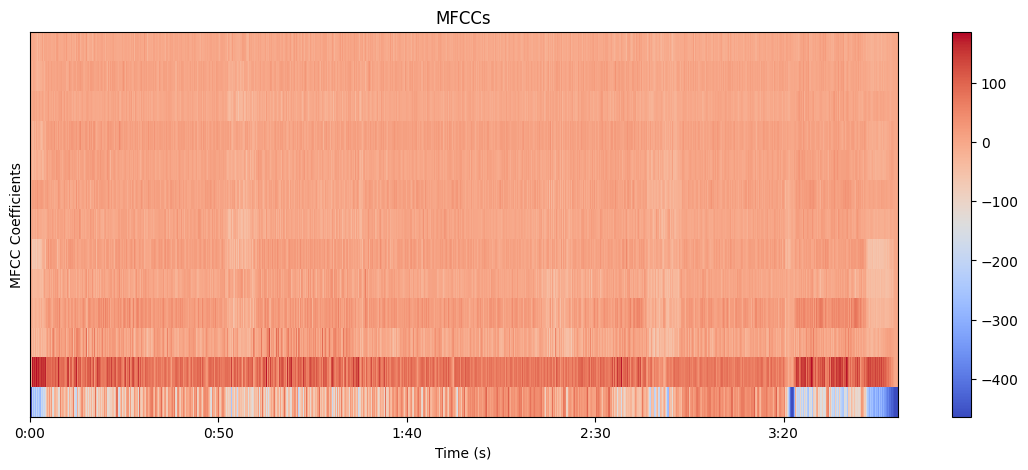

In [5]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.show()


## Frequency Domain Representation (Fourier Transform)

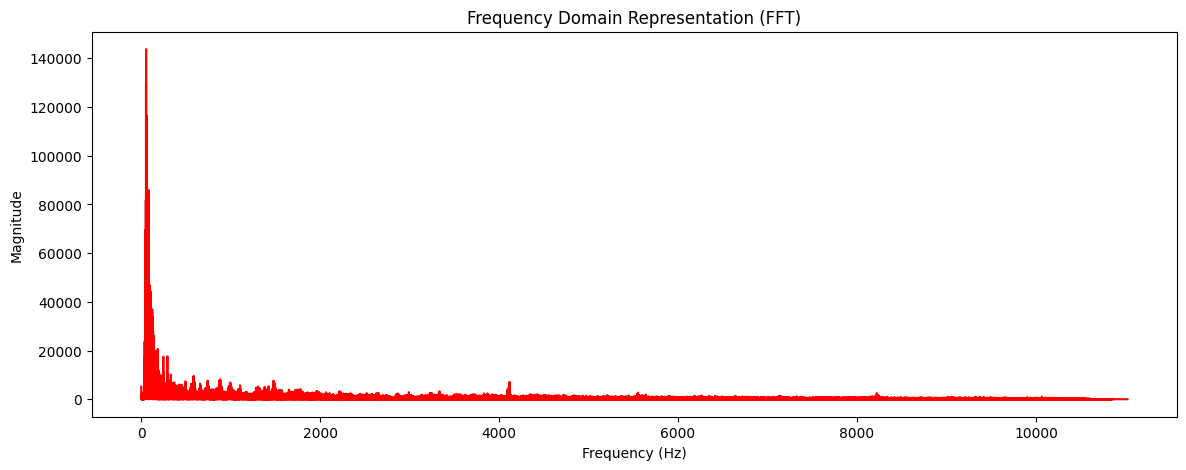

In [6]:
# Compute the Fourier Transform of the audio signal
fft_result = np.fft.fft(y)
fft_freq = np.fft.fftfreq(len(y), 1/sr)

# Plot the magnitude of the FFT in red
plt.figure(figsize=(14, 5))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_result)[:len(fft_result)//2], color='red')  # Red color
plt.title('Frequency Domain Representation (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


## Applying a Band-Pass Filter

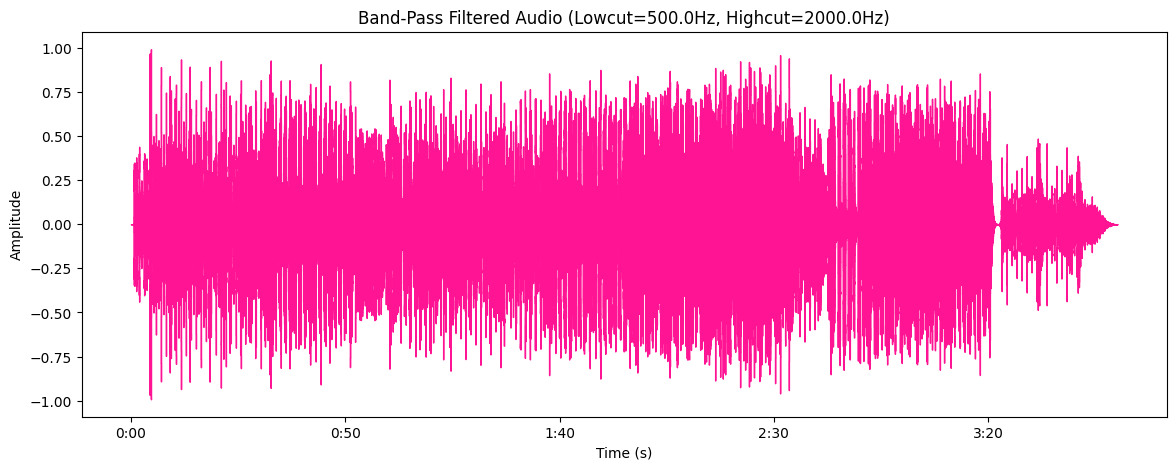

In [7]:
# Define the band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    return lfilter(b, a, data)

# Apply filter to audio (example: 500 Hz to 2000 Hz range)
lowcut = 500.0
highcut = 2000.0
filtered_audio = bandpass_filter(y, lowcut, highcut, sr)

# Plot the filtered audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(filtered_audio, sr=sr, color='deeppink')
plt.title(f'Band-Pass Filtered Audio (Lowcut={lowcut}Hz, Highcut={highcut}Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


## Chromagram

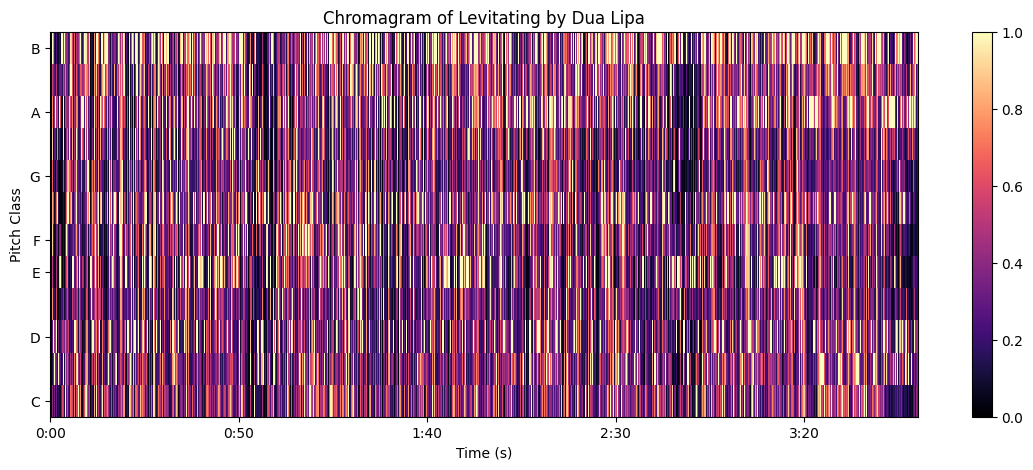

In [8]:
# Compute the chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the chromagram
plt.figure(figsize=(14, 5))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.title('Chromagram of Levitating by Dua Lipa')
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.show()


## Zero-Crossing Rate (ZCR)

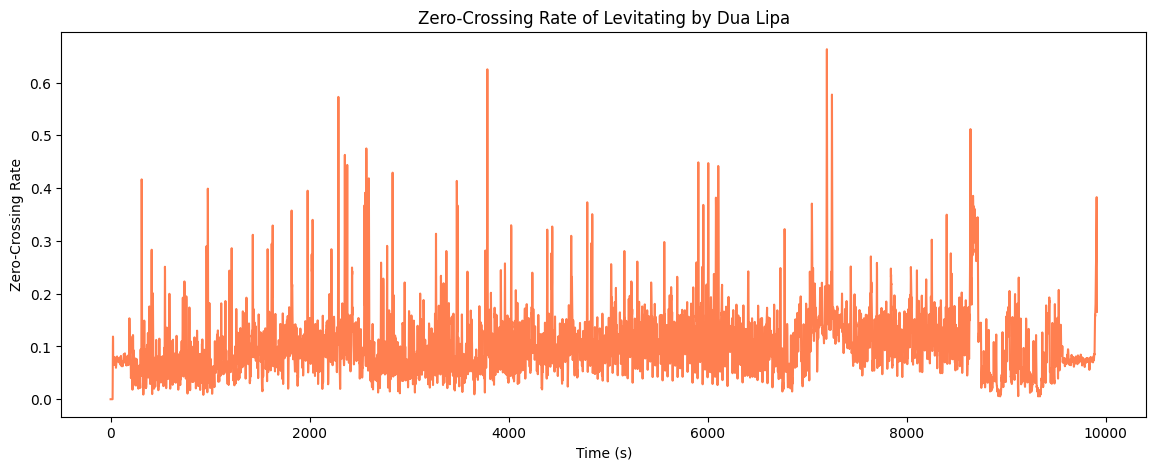

In [9]:
# Compute the Zero-Crossing Rate (ZCR)
zcr = librosa.feature.zero_crossing_rate(y)

# Plot the ZCR (ensure to plot a single row, not the whole matrix)
plt.figure(figsize=(14, 5))
plt.plot(zcr[0], color='coral')  # Plot the first row of the ZCR matrix (since it's 2D)
plt.title('Zero-Crossing Rate of Levitating by Dua Lipa')
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')
plt.show()


## Tempo and Beat Tracking

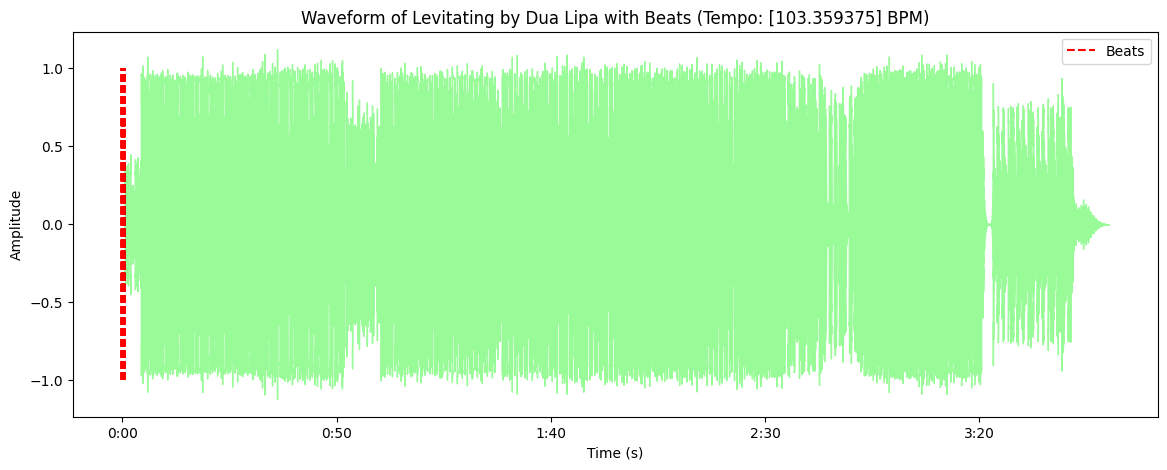

In [10]:
# Detect the tempo and beats in the song
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

# Plot the waveform and overlay the beat positions
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='palegreen')
plt.vlines(beats / sr, ymin=-1, ymax=1, color='r', linestyle='--', label='Beats')
plt.title(f'Waveform of Levitating by Dua Lipa with Beats (Tempo: {tempo} BPM)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## Tuning (Pitch) Visualization

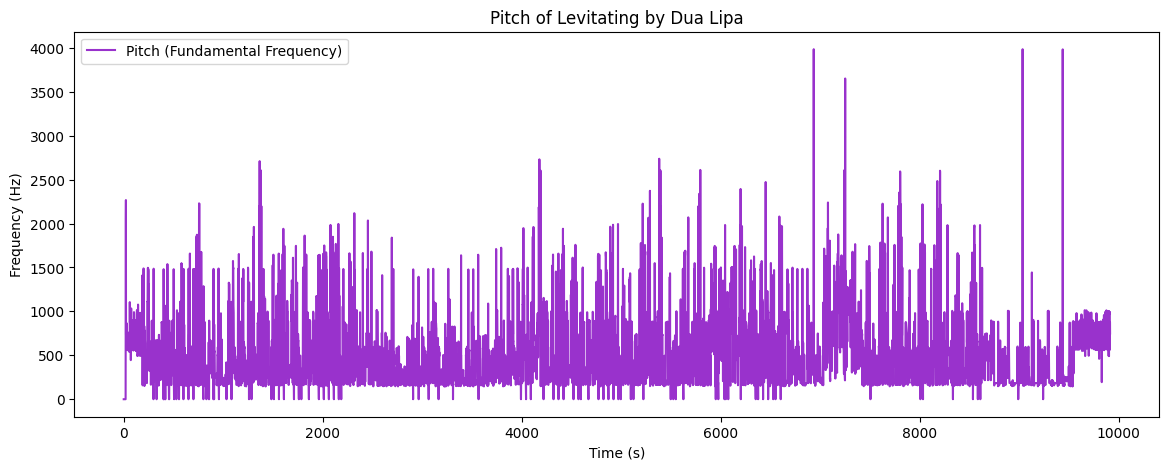

In [11]:
# Extract pitch (fundamental frequency) of the audio
pitch, mag = librosa.core.piptrack(y=y, sr=sr)

# Find the pitch for each frame
pitches = []
for t in range(pitch.shape[1]):
    index = mag[:, t].argmax()
    pitches.append(pitch[index, t])

# Plot the pitch
plt.figure(figsize=(14, 5))
plt.plot(pitches, label='Pitch (Fundamental Frequency)',color='darkorchid')
plt.title('Pitch of Levitating by Dua Lipa')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()


## Wavelet Transform (Continuous Wavelet Transform)

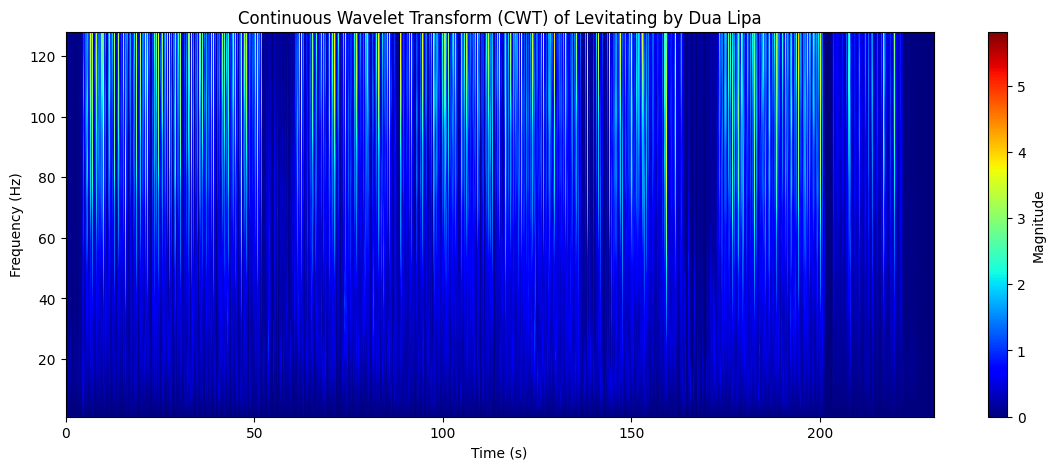

In [12]:
# Compute the continuous wavelet transform with specified parameters
wavelet = 'cmor1.0-0.5'  # Example of the 'cmor' wavelet with center frequency and bandwidth
coefficients, frequencies = pywt.cwt(y, np.arange(1, 128), wavelet)

# Plot the wavelet transform
plt.figure(figsize=(14, 5))
plt.imshow(abs(coefficients), aspect='auto', extent=[0, len(y)/sr, 1, 128], cmap='jet', origin='lower')
plt.title('Continuous Wavelet Transform (CWT) of Levitating by Dua Lipa')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.show()


## Amplitude Envelope

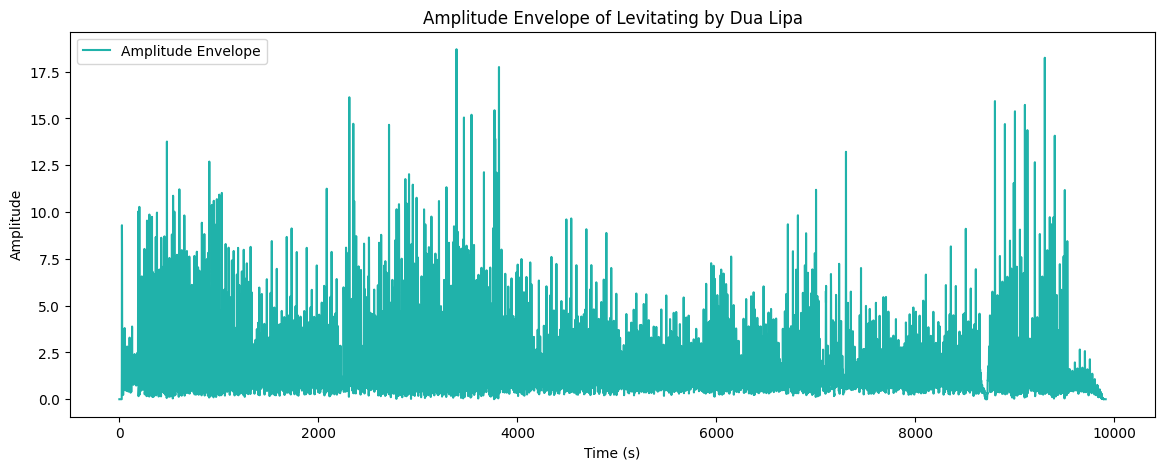

In [13]:
# Compute the envelope of the signal
envelope = librosa.onset.onset_strength(y=y, sr=sr)

# Plot the amplitude envelope
plt.figure(figsize=(14, 5))
plt.plot(envelope, label='Amplitude Envelope', color='lightseagreen')
plt.title('Amplitude Envelope of Levitating by Dua Lipa')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
